In [58]:
import csv
import numpy as np
import re
import matplotlib.pyplot as plt

regex1 = r"\d+"
regex2 = r"c\d+"
A = np.zeros((1000,10000)) #1.000x10.000 matrix

In [59]:
#load data
with open("data_train.csv") as csvfile:
	readCSV = csv.reader(csvfile,delimiter=',')
	next(readCSV) #discard header
	for row in readCSV:
		match = re.search(regex1,row[0])
		match2 = re.search(regex2,row[0])
		row_i = int(match.group(0))-1
		col_i = int(match2.group(0)[1:]) -1
		A[col_i,row_i] = int(row[1])

In [80]:
means = np.mean(A,axis=1)
totalmean = np.mean(means)
K = 25
sums = np.sum(A,axis=1)
bettermean = [(totalmean*K + sums[i])/(K+10000) for i in range(means.shape[0])]
for x in range(A.shape[0]): #x is cols
	for y in range(A.shape[1]):
		if A[x,y]==0:
			A[x,y] = bettermean[x]

(1000,)


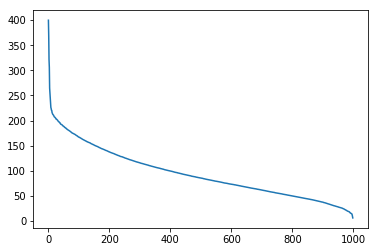

In [19]:
#SVD
U, D, V = np.linalg.svd(A, full_matrices=False)
print(D.shape)
plt.plot(D[1:])
plt.show()

In [20]:
dim = 100
total = 1000-dim
D = np.append(D[0:dim],np.zeros((total)))

In [21]:
print(D)
D = np.diag(D)

print(D.shape)

Uprime = np.dot(U,np.sqrt(D))
Vprime = np.dot(np.sqrt(D),V)

[ 3127.52252159   399.80258842   368.67171762   321.35920395   305.79154771
   264.46835928   253.96903      241.75409776   235.44005047   225.9357613
   223.83480829   220.29253871   219.90582082   215.52262089   214.42211913
   212.49009079   211.87875771   211.02938625   210.38101159   208.88843409
     0.             0.             0.             0.             0.             0.
     0.             0.             0.             0.             0.             0.
     0.             0.             0.             0.             0.             0.
     0.             0.             0.             0.             0.             0.
     0.             0.             0.             0.             0.             0.
     0.             0.             0.             0.             0.             0.
     0.             0.             0.             0.             0.             0.
     0.             0.             0.             0.             0.             0.
     0.             0.           

In [22]:
print(U.shape, D.shape, V.shape)
print(Uprime.shape, Vprime.shape)
B = np.dot(U,np.dot(D,V))
print(np.isclose(A,B).all())

(1000, 1000) (1000, 1000) (1000, 10000)
(1000, 1000) (1000, 10000)
False


In [24]:
#now lets predict the data from samplesubmission
fout = open('mysubmission.csv', 'w')
fout.write("Id,Prediction\n")
with open("SampleSubmission.csv") as csvfile:
    readCSV = csv.reader(csvfile,delimiter=',')
    next(readCSV) #discard header
    for row in readCSV:
        match = re.search(regex1,row[0])
        match2 = re.search(regex2,row[0])
        row_i = int(match.group(0))-1
        col_i = int(match2.group(0)[1:]) -1
        calc = np.dot(Uprime[col_i,:],Vprime.T[row_i,:])
        A[col_i,row_i] = calc
        fout.write(row[0]+","+str(calc)+"\n")
    fout.close()

In [ ]:
#now we need to drop some sigmas to find the underlying structure
